## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
 """建立你的神經網"""

def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128, 64]):
    input_layer  = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0 :
            x = keras.layers.Dense(units = n_units, activation='relu', name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation='relu', name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units = output_units, activation='softmax', name = 'output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs = [out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()  #刪除舊的Graph
    print("Experiment with LR = %.6f" %(lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr = lr, nesterov = True, momentum=MOMENTUM)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
     # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

W0716 20:24:09.123879  2488 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 47s 930us/step - loss: 2.0724 - acc: 0.2192 - val_loss: 1.9340 - val_acc: 0.2698
Epoch 2/50
50000/50000 [==============================] - 27s 542us/step - loss: 1.8412 - acc: 0.3291 - val_loss: 1.8431 - val_acc: 0.3392
Epoch 3/50
50000/50000 [==============================] - 21s 416us/step - loss: 1.7388 - acc: 0.3739 - val_loss: 1.7273 - val_acc: 0.3826
Epoch 4/50
50000/50000 [==============================] - 17s 331us/step - loss: 1.6813 - acc: 0.3980 - val_loss: 1.8736 - val_acc: 0.3385
Epoch 5/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.6590 - acc: 0.4049 - val_loss: 1.8928 - val_acc: 0.3621
Epoch 6/50
50000/50000 [==============================] - 27s 531us/step - loss: 1.6276 - acc: 0.4185 - val_loss: 1.6650 - val_acc: 0.4027
Epoch 7/50
50000/50000 [==============================] - 26s 526us/step - loss: 1.6109 - acc: 0.4253 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.8483 - acc: 0.3353 - val_loss: 1.7210 - val_acc: 0.3856
Epoch 2/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.6167 - acc: 0.4241 - val_loss: 1.5382 - val_acc: 0.4517
Epoch 3/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.5252 - acc: 0.4588 - val_loss: 1.5149 - val_acc: 0.4611
Epoch 4/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.4608 - acc: 0.4814 - val_loss: 1.4819 - val_acc: 0.4708
Epoch 5/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.4154 - acc: 0.4962 - val_loss: 1.4968 - val_acc: 0.4696
Epoch 6/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.3731 - acc: 0.5124 - val_loss: 1.4347 - val_acc: 0.4892
Epoch 7/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.3415 - acc: 0.5242 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 271us/step - loss: 2.0764 - acc: 0.2425 - val_loss: 1.9000 - val_acc: 0.3320
Epoch 2/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.8239 - acc: 0.3573 - val_loss: 1.7581 - val_acc: 0.3835
Epoch 3/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.7227 - acc: 0.3920 - val_loss: 1.6802 - val_acc: 0.4092
Epoch 4/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.6537 - acc: 0.4178 - val_loss: 1.6467 - val_acc: 0.4194
Epoch 5/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.6012 - acc: 0.4350 - val_loss: 1.6045 - val_acc: 0.4303
Epoch 6/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.5569 - acc: 0.4503 - val_loss: 1.5657 - val_acc: 0.4462
Epoch 7/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5190 - acc: 0.4636 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.2596 - acc: 0.1529 - val_loss: 2.1949 - val_acc: 0.2070
Epoch 2/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.1441 - acc: 0.2310 - val_loss: 2.1010 - val_acc: 0.2588
Epoch 3/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.0617 - acc: 0.2723 - val_loss: 2.0300 - val_acc: 0.2845
Epoch 4/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.9987 - acc: 0.2935 - val_loss: 1.9750 - val_acc: 0.3020
Epoch 5/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.9524 - acc: 0.3109 - val_loss: 1.9366 - val_acc: 0.3189
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.9177 - acc: 0.3246 - val_loss: 1.9066 - val_acc: 0.3327
Epoch 7/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.8904 - acc: 0.3360 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 299us/step - loss: 2.3101 - acc: 0.1040 - val_loss: 2.2953 - val_acc: 0.1233
Epoch 2/50
50000/50000 [==============================] - 13s 263us/step - loss: 2.2902 - acc: 0.1403 - val_loss: 2.2805 - val_acc: 0.1602
Epoch 3/50
50000/50000 [==============================] - 11s 219us/step - loss: 2.2769 - acc: 0.1601 - val_loss: 2.2684 - val_acc: 0.1728
Epoch 4/50
50000/50000 [==============================] - 12s 242us/step - loss: 2.2659 - acc: 0.1721 - val_loss: 2.2582 - val_acc: 0.1829
Epoch 5/50
50000/50000 [==============================] - 11s 211us/step - loss: 2.2559 - acc: 0.1820 - val_loss: 2.2484 - val_acc: 0.1906
Epoch 6/50
50000/50000 [==============================] - 12s 239us/step - loss: 2.2464 - acc: 0.1920 - val_loss: 2.2389 - val_acc: 0.2006
Epoch 7/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.2372 - acc: 0.2008 - val_loss: 2.

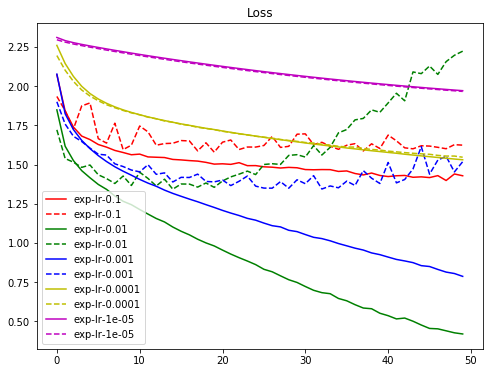

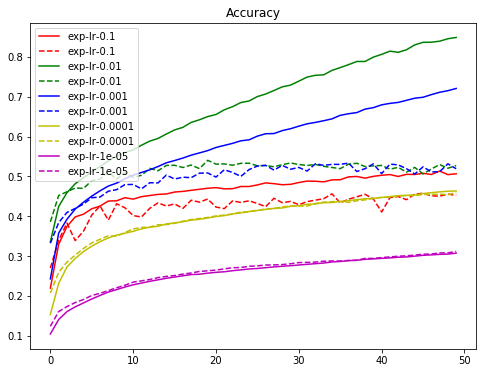

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()